In [ ]:
# import all the neccessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# if data is stored in excel specify the path and the sheet name
# i have converted into csv and uploaded onto google colab

data = pd.read_csv('/content/vw_stayed_churned.csv')

In [ ]:
data.head()

,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
0,19877-DEL,Male,35,No,Delhi,7,27,NaN,Yes,No,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,58353-MAH,Female,45,Yes,Maharashtra,14,13,NaN,Yes,Yes,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,25063-WES,Male,51,No,West Bengal,4,35,Deal 5,Yes,No,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,59787-KAR,Male,79,No,Karnataka,3,21,Deal 4,Yes,No,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,28544-TAM,Female,80,No,Tamil Nadu,3,8,NaN,Yes,No,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [ ]:
data['Customer_Status'].value_counts()

,count
Customer_Status,
Stayed,4275
Churned,1732


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6007 entries, 0 to 6006
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer_ID                  6007 non-null   object 
 1   Gender                       6007 non-null   object 
 2   Age                          6007 non-null   int64  
 3   Married                      6007 non-null   object 
 4   State                        6007 non-null   object 
 5   Number_of_Referrals          6007 non-null   int64  
 6   Tenure_in_Months             6007 non-null   int64  
 7   Value_Deal                   2710 non-null   object 
 8   Phone_Service                6007 non-null   object 
 9   Multiple_Lines               5417 non-null   object 
 10  Internet_Service             6007 non-null   object 
 11  Internet_Type                4784 non-null   object 
 12  Online_Security              4784 non-null   object 
 13  Online_Backup     

In [ ]:
data.describe()

,Age,Number_of_Referrals,Tenure_in_Months,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue
count,6007.000000,6007.000000,6007.00000,6007.000000,6007.000000,6007.000000,6007.000000,6007.000000,6007.000000
mean,47.289163,7.439820,17.39454,65.087598,2430.986173,2.038612,7.015149,797.283311,3233.246021
std,16.805110,4.622369,10.59292,31.067808,2267.481294,8.065520,25.405737,854.858841,2856.181082
min,18.000000,0.000000,1.00000,-10.000000,19.100000,0.000000,0.000000,0.000000,21.610000
25%,33.000000,3.000000,8.00000,35.950000,539.950000,0.000000,0.000000,107.085000,833.685000
50%,47.000000,7.000000,17.00000,71.100000,1556.850000,0.000000,0.000000,470.220000,2367.150000
75%,60.000000,11.000000,27.00000,90.450000,4013.900000,0.000000,0.000000,1269.840000,5105.685000
max,84.000000,15.000000,36.00000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000


In [ ]:
data.isnull().sum()

,0
Customer_ID,0
Gender,0
Age,0
Married,0
State,0
Number_of_Referrals,0
Tenure_in_Months,0
Value_Deal,3297
Phone_Service,0
Multiple_Lines,590


In [ ]:
data['Customer_Status'].unique()

array(['Stayed', 'Churned'], dtype=object)

In [ ]:
data['Customer_Status'] = data['Customer_Status'].str.strip()  # Remove leading/trailing spaces

In [ ]:
data['Customer_Status'].unique()

array(['Stayed', 'Churned'], dtype=object)

In [ ]:
#Data Preprcessing

# drop all the columns which will not help in predictions

data.drop(['Customer_ID','Churn_Category', 'Churn_Reason','Value_Deal'],axis=1,inplace=True)


In [ ]:
#label encoders
# converting all categorical columns into 0s and 1s

columns_to_encode = ['Gender', 'Married', 'State','Phone_Service', 'Multiple_Lines',
        'Internet_Service', 'Internet_Type',
       'Online_Security', 'Online_Backup', 'Device_Protection_Plan',
       'Premium_Support', 'Streaming_TV', 'Streaming_Movies',
       'Streaming_Music', 'Unlimited_Data','Contract', 'Paperless_Billing',
       'Payment_Method']

label_encoder = {}

for column in columns_to_encode:
    label_encoder[column] = LabelEncoder()
    data[column] = label_encoder[column].fit_transform(data[column])

#maually ecnode the target variable customer status(stayed:0, churned:1)

data['Customer_Status'] = data['Customer_Status'].map({'Stayed': 0, 'Churned': 1})



In [ ]:
data

,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Phone_Service,Multiple_Lines,Internet_Service,Internet_Type,...,Contract,Paperless_Billing,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status
0,1,35,0,4,7,27,1,0,1,0,...,1,1,1,65.60,593.30,0.00,0,381.51,974.81,0
1,0,45,1,12,14,13,1,1,1,0,...,0,0,1,-4.00,542.40,38.33,10,96.21,610.28,0
2,1,51,0,21,4,35,1,0,1,2,...,0,1,0,73.90,280.85,0.00,0,134.60,415.45,1
3,1,79,0,9,3,21,1,0,1,2,...,0,1,0,98.00,1237.85,0.00,0,361.66,1599.51,1
4,0,80,0,17,3,8,1,0,1,2,...,0,1,1,83.90,267.40,0.00,0,22.14,289.54,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6002,0,41,0,19,6,33,1,1,1,2,...,0,1,1,74.40,896.75,0.00,0,37.96,934.71,1
6003,1,51,1,6,0,19,0,2,1,1,...,2,0,1,45.25,3139.80,0.00,0,0.00,3139.80,0
6004,0,65,1,10,14,25,1,1,1,2,...,0,1,0,74.95,2869.85,0.00,0,599.64,3469.49,1
6005,1,23,0,13,2,10,1,1,1,1,...,1,1,1,70.15,4480.70,0.00,0,2107.52,6588.22,0


In [ ]:
data.columns

Index(['Gender', 'Age', 'Married', 'State', 'Number_of_Referrals',
       'Tenure_in_Months', 'Phone_Service', 'Multiple_Lines',
       'Internet_Service', 'Internet_Type', 'Online_Security', 'Online_Backup',
       'Device_Protection_Plan', 'Premium_Support', 'Streaming_TV',
       'Streaming_Movies', 'Streaming_Music', 'Unlimited_Data', 'Contract',
       'Paperless_Billing', 'Payment_Method', 'Monthly_Charge',
       'Total_Charges', 'Total_Refunds', 'Total_Extra_Data_Charges',
       'Total_Long_Distance_Charges', 'Total_Revenue', 'Customer_Status'],
      dtype='object')

In [ ]:
# split the data into features and target

X = data.drop('Customer_Status', axis=1)
y = data['Customer_Status']

# split the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.isna().sum()

,0
Gender,0
Age,0
Married,0
State,0
Number_of_Referrals,0
Tenure_in_Months,0
Phone_Service,0
Multiple_Lines,0
Internet_Service,0
Internet_Type,0


In [ ]:
X_test.isna().sum()

,0
Gender,0
Age,0
Married,0
State,0
Number_of_Referrals,0
Tenure_in_Months,0
Phone_Service,0
Multiple_Lines,0
Internet_Service,0
Internet_Type,0


In [ ]:
y_train.isna().sum()

0

In [ ]:
y_test.isna().sum()

0

In [ ]:
y_train

,Customer_Status
5632,0
5838,0
2348,0
5332,0
5661,0
...,...
3772,0
5191,1
5226,1
5390,0


In [ ]:
#Train Random Forest Model

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
data.sample(10)

,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Phone_Service,Multiple_Lines,Internet_Service,Internet_Type,...,Contract,Paperless_Billing,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status
5426,0,40,1,21,9,18,0,2,1,0,...,2,0,1,59.95,3921.10,0.00,0,0.00,3921.10,0
1723,1,23,1,11,7,7,1,0,1,2,...,0,1,0,90.75,90.75,0.00,0,23.06,113.81,1
4085,1,29,0,18,9,10,1,0,1,0,...,1,1,0,94.40,5610.25,0.00,0,2844.00,8454.25,1
945,0,19,0,5,1,8,1,1,1,0,...,1,1,0,68.40,3972.25,0.00,0,1565.42,5537.67,0
891,0,74,0,18,15,26,1,0,1,2,...,2,1,0,85.15,3670.50,0.00,0,1955.36,5625.86,0
5966,1,52,0,0,11,29,1,0,1,1,...,0,1,1,70.75,450.80,0.00,0,163.45,614.25,1
2710,0,29,0,0,6,34,1,1,1,2,...,1,0,0,108.45,7176.55,9.68,0,1478.32,8645.19,1
4228,0,65,1,12,13,12,1,1,1,2,...,1,1,0,90.70,2835.50,0.00,0,1372.06,4207.56,0
3701,1,33,1,15,2,5,1,0,1,2,...,2,1,1,99.65,4220.35,0.00,0,887.24,5107.59,0
4995,0,45,1,19,0,15,1,0,1,2,...,1,1,1,87.70,1725.95,0.00,0,819.09,2545.04,0


In [ ]:
#Evaluate Model
#Make Predictions

y_pred = rf_model.predict(X_test)

#evaluate the model
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

print('\nClassification Report:')
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[791  50]
 [131 230]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.94      0.90       841
           1       0.82      0.64      0.72       361

    accuracy                           0.85      1202
   macro avg       0.84      0.79      0.81      1202
weighted avg       0.85      0.85      0.84      1202



#Confusion Matrix
-- TP [True Positive]
-- These are the cases when model correctly classify the positive classes which is *230*

-- TN [True Negative]
-- These are the cases when model correctly classify Negative classes which *791*

-- FP [False Positive]
-- These are the cases when model incorrectly predicted the positively classes when it is negative *50*

-- FN [False Negative]
-- These are the cases when model incorrectly predicted nagative classes when it is positive *131*

In [ ]:
# features selection using features importance

feature_importances = rf_model.feature_importances_
indices = np.argsort(feature_importances)[::-1]


<ipython-input-75-6f6319813fca>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances[indices], y=X.columns[indices],palette='viridis')


<function matplotlib.pyplot.show(close=None, block=None)>

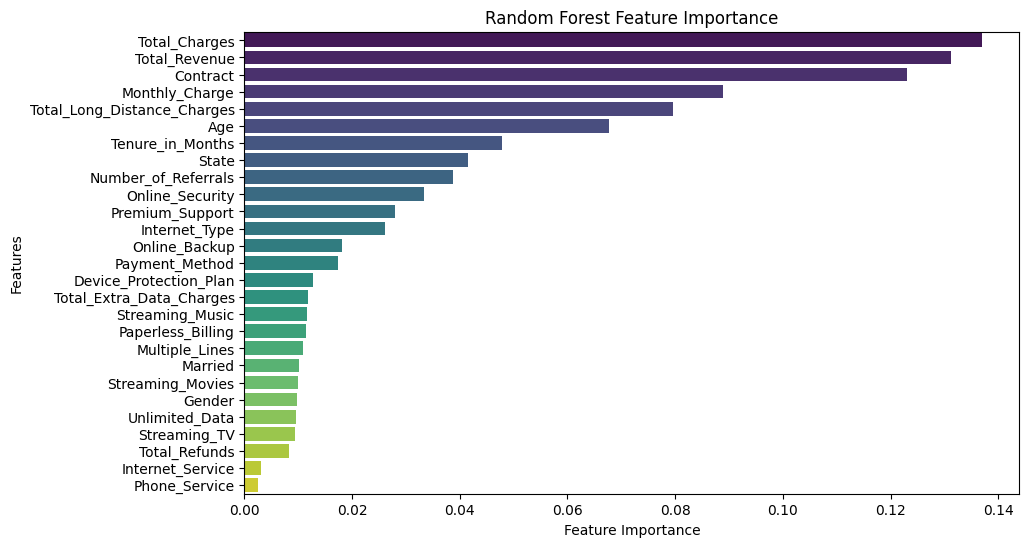

In [ ]:
# plot the features impotance

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances[indices], y=X.columns[indices],palette='viridis')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Random Forest Feature Importance')
plt.show

In [ ]:
#dropping the columns which are less than 0.01 which are less importance

# only taking the features which ahve more than 0,01 importance

#columns_to_drop = X.columns[feature_importances < 0.01]
#X.drop(columns=columns_to_drop)

,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Multiple_Lines,Internet_Type,Online_Security,Online_Backup,Device_Protection_Plan,Premium_Support,Streaming_Music,Contract,Paperless_Billing,Payment_Method,Monthly_Charge,Total_Charges,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue
0,35,0,4,7,27,0,0,0,1,0,1,0,1,1,1,65.60,593.30,0,381.51,974.81
1,45,1,12,14,13,1,0,0,0,0,0,1,0,0,1,-4.00,542.40,10,96.21,610.28
2,51,0,21,4,35,0,2,0,0,1,0,0,0,1,0,73.90,280.85,0,134.60,415.45
3,79,0,9,3,21,0,2,0,1,1,0,0,0,1,0,98.00,1237.85,0,361.66,1599.51
4,80,0,17,3,8,0,2,0,0,0,1,0,0,1,1,83.90,267.40,0,22.14,289.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6002,41,0,19,6,33,1,2,0,0,0,0,0,0,1,1,74.40,896.75,0,37.96,934.71
6003,51,1,6,0,19,2,1,1,1,1,1,0,2,0,1,45.25,3139.80,0,0.00,3139.80
6004,65,1,10,14,25,1,2,0,0,0,0,0,0,1,0,74.95,2869.85,0,599.64,3469.49
6005,23,0,13,2,10,1,1,0,1,0,1,1,1,1,1,70.15,4480.70,0,2107.52,6588.22


In [ ]:
columns_to_drop

Index(['Gender', 'Phone_Service', 'Internet_Service', 'Streaming_TV',
       'Streaming_Movies', 'Unlimited_Data', 'Total_Refunds'],
      dtype='object')

In [ ]:
# drop all the columns which will not help in predictions

#data.drop(['Gender', 'Married', 'Phone_Service', 'Multiple_Lines','Internet_Service', 'Device_Protection_Plan', 'Streaming_TV', 'Streaming_Movies', 'Streaming_Music', 'Unlimited_Data','Paperless_Billing', 'Total_Refunds', 'Total_Extra_Data_Charges'],axis=1,inplace=True)



In [ ]:
"""#label encoders
# converting all categorical columns into 0s and 1s

columns_to_encode = ['State', 'Internet_Type',
       'Online_Security', 'Online_Backup','Premium_Support', 'Contract','Payment_Method']

label_encoder = {}

for column in columns_to_encode:
    label_encoder[column] = LabelEncoder()
    data[column] = label_encoder[column].fit_transform(data[column])

#maually ecnode the target variable customer status(stayed:0, churned:1)

data['Customer_Status'] = data['Customer_Status'].map({'Stayed': 0, 'Churned': 1})"""

"#label encoders\n# converting all categorical columns into 0s and 1s\n\ncolumns_to_encode = ['State', 'Internet_Type',\n       'Online_Security', 'Online_Backup','Premium_Support', 'Contract','Payment_Method']\n\nlabel_encoder = {}\n\nfor column in columns_to_encode:\n    label_encoder[column] = LabelEncoder()\n    data[column] = label_encoder[column].fit_transform(data[column])\n\n#maually ecnode the target variable customer status(stayed:0, churned:1)\n\ndata['Customer_Status'] = data['Customer_Status'].map({'Stayed': 0, 'Churned': 1})"

In [ ]:
new_data = pd.read_csv('/content/vw_joined.csv')

In [ ]:
new_data.head()

,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
0,93520-GUJ,Female,67,No,Gujarat,13,19,Deal 5,Yes,Yes,...,Bank Withdrawal,72.10,72.1,0.0,0,7.77,79.87,Joined,NaN,NaN
1,57256-BIH,Female,18,No,Bihar,9,7,NaN,Yes,No,...,Credit Card,19.85,57.2,0.0,0,9.36,66.56,Joined,NaN,NaN
2,72357-MAD,Female,53,No,Madhya Pradesh,14,12,Deal 5,Yes,No,...,Credit Card,44.30,44.3,0.0,0,42.95,87.25,Joined,NaN,NaN
3,66612-KAR,Female,58,Yes,Karnataka,11,18,NaN,Yes,No,...,Credit Card,19.95,58.0,0.0,0,8.07,66.07,Joined,NaN,NaN
4,22119-WES,Male,31,Yes,West Bengal,5,5,NaN,Yes,No,...,Credit Card,20.05,33.7,0.0,0,3.62,37.32,Joined,NaN,NaN


In [ ]:
new_data['Customer_Status'].value_counts()

,count
Customer_Status,
Joined,411


In [ ]:
#make a copy of prediction data
original_data = new_data.copy()

In [ ]:
original_data

,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
0,93520-GUJ,Female,67,No,Gujarat,13,19,Deal 5,Yes,Yes,...,Bank Withdrawal,72.10,72.10,0.0,0,7.77,79.87,Joined,NaN,NaN
1,57256-BIH,Female,18,No,Bihar,9,7,NaN,Yes,No,...,Credit Card,19.85,57.20,0.0,0,9.36,66.56,Joined,NaN,NaN
2,72357-MAD,Female,53,No,Madhya Pradesh,14,12,Deal 5,Yes,No,...,Credit Card,44.30,44.30,0.0,0,42.95,87.25,Joined,NaN,NaN
3,66612-KAR,Female,58,Yes,Karnataka,11,18,NaN,Yes,No,...,Credit Card,19.95,58.00,0.0,0,8.07,66.07,Joined,NaN,NaN
4,22119-WES,Male,31,Yes,West Bengal,5,5,NaN,Yes,No,...,Credit Card,20.05,33.70,0.0,0,3.62,37.32,Joined,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,31412-HAR,Female,81,Yes,Haryana,14,29,NaN,Yes,No,...,Bank Withdrawal,19.20,37.20,0.0,0,14.06,51.26,Joined,NaN,NaN
407,54997-UTT,Female,55,No,Uttar Pradesh,7,23,NaN,Yes,No,...,Credit Card,44.00,44.00,0.0,0,26.15,70.15,Joined,NaN,NaN
408,56728-RAJ,Male,40,No,Rajasthan,0,1,NaN,Yes,No,...,Credit Card,45.60,45.60,0.0,0,37.44,83.04,Joined,NaN,NaN
409,47624-TAM,Female,62,Yes,Tamil Nadu,7,29,NaN,Yes,No,...,Mailed Check,-5.00,189.10,0.0,0,100.59,289.69,Joined,NaN,NaN


In [ ]:
#retain the customer id column

customer_ids = new_data['Customer_ID']

In [ ]:
customer_ids

,Customer_ID
0,93520-GUJ
1,57256-BIH
2,72357-MAD
3,66612-KAR
4,22119-WES
...,...
406,31412-HAR
407,54997-UTT
408,56728-RAJ
409,47624-TAM


In [ ]:
# drop the columns whicg are notuse for prediction in encoded dataframe

new_data = new_data.drop(['Customer_ID','Churn_Category', 'Churn_Reason','Value_Deal','Customer_Status'],axis=1)

In [ ]:
new_data

,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Phone_Service,Multiple_Lines,Internet_Service,Internet_Type,...,Unlimited_Data,Contract,Paperless_Billing,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue
0,Female,67,No,Gujarat,13,19,Yes,Yes,Yes,Fiber Optic,...,Yes,One Year,Yes,Bank Withdrawal,72.10,72.10,0.0,0,7.77,79.87
1,Female,18,No,Bihar,9,7,Yes,No,No,NaN,...,NaN,Month-to-Month,No,Credit Card,19.85,57.20,0.0,0,9.36,66.56
2,Female,53,No,Madhya Pradesh,14,12,Yes,No,Yes,DSL,...,Yes,Month-to-Month,Yes,Credit Card,44.30,44.30,0.0,0,42.95,87.25
3,Female,58,Yes,Karnataka,11,18,Yes,No,No,NaN,...,NaN,Month-to-Month,No,Credit Card,19.95,58.00,0.0,0,8.07,66.07
4,Male,31,Yes,West Bengal,5,5,Yes,No,No,NaN,...,NaN,Month-to-Month,No,Credit Card,20.05,33.70,0.0,0,3.62,37.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,Female,81,Yes,Haryana,14,29,Yes,No,No,NaN,...,NaN,Two Year,No,Bank Withdrawal,19.20,37.20,0.0,0,14.06,51.26
407,Female,55,No,Uttar Pradesh,7,23,Yes,No,Yes,DSL,...,Yes,Month-to-Month,Yes,Credit Card,44.00,44.00,0.0,0,26.15,70.15
408,Male,40,No,Rajasthan,0,1,Yes,No,Yes,DSL,...,Yes,Month-to-Month,No,Credit Card,45.60,45.60,0.0,0,37.44,83.04
409,Female,62,Yes,Tamil Nadu,7,29,Yes,No,Yes,DSL,...,Yes,Month-to-Month,No,Mailed Check,-5.00,189.10,0.0,0,100.59,289.69


In [ ]:
#Encode catogorical variable

for column in new_data.select_dtypes(include=['object']).columns:
    new_data[column] = label_encoder[column].transform(new_data[column])

In [ ]:
# Make Predictions

new_predictions = rf_model.predict(new_data)

In [ ]:
# add new prediction to the orginal data frame

original_data['Customer_Status_Predicted'] = new_predictions

In [ ]:
original_data['Customer_Status_Predicted'].value_counts()

,count
Customer_Status_Predicted,
1,383
0,28


In [ ]:
#Filter the data to only the keep churned data where status == 1

original_data = original_data[original_data['Customer_Status_Predicted'] == 1]

In [ ]:
original_data

,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,...,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason,Customer_Status_Predicted
0,93520-GUJ,Female,67,No,Gujarat,13,19,Deal 5,Yes,Yes,...,72.10,72.1,0.0,0,7.77,79.87,Joined,NaN,NaN,1
1,57256-BIH,Female,18,No,Bihar,9,7,NaN,Yes,No,...,19.85,57.2,0.0,0,9.36,66.56,Joined,NaN,NaN,1
2,72357-MAD,Female,53,No,Madhya Pradesh,14,12,Deal 5,Yes,No,...,44.30,44.3,0.0,0,42.95,87.25,Joined,NaN,NaN,1
3,66612-KAR,Female,58,Yes,Karnataka,11,18,NaN,Yes,No,...,19.95,58.0,0.0,0,8.07,66.07,Joined,NaN,NaN,1
4,22119-WES,Male,31,Yes,West Bengal,5,5,NaN,Yes,No,...,20.05,33.7,0.0,0,3.62,37.32,Joined,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,21065-HAR,Male,27,No,Haryana,5,10,NaN,Yes,No,...,20.30,20.3,0.0,0,10.84,31.14,Joined,NaN,NaN,1
406,31412-HAR,Female,81,Yes,Haryana,14,29,NaN,Yes,No,...,19.20,37.2,0.0,0,14.06,51.26,Joined,NaN,NaN,1
407,54997-UTT,Female,55,No,Uttar Pradesh,7,23,NaN,Yes,No,...,44.00,44.0,0.0,0,26.15,70.15,Joined,NaN,NaN,1
408,56728-RAJ,Male,40,No,Rajasthan,0,1,NaN,Yes,No,...,45.60,45.6,0.0,0,37.44,83.04,Joined,NaN,NaN,1


In [ ]:
#save the file to the appropriate file

original_data.to_csv('predicted_churned_customers.csv', index=False)

In [ ]:
#Fill all nan values in churn categroy and churn reason because in this data the customer has joined the company and we are trying to predict the future churners
#In result we got 383 customer will be going to churn anyhow as per our model


In [ ]:
import pandas as pd
import numpy as np

predicted_churn = pd.read_csv('/content/predicted_churned_customers.csv')

In [ ]:
predicted_churn.shape

(383, 33)